<a href="https://colab.research.google.com/github/sankhapanineog/AI/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Centering the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Load data
data = pd.read_csv('preprocessed.csv')

# Step 1: Centering the Data
centered_data, mean = center_data(data)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Add target variable to the transformed data
transformed_df = pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2'])
transformed_df['Health_Status'] = data['Health_Status']

# Split the data into features and target
X = transformed_df.drop('Health_Status', axis=1)
y = transformed_df['Health_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_df['PC1'], transformed_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Vibration and Noise Data')
plt.grid(True)
plt.show()


Explained variance ratio: [9.99969966e-01 3.00338434e-05]


KeyError: 'Health_Status'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Centering the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc1_values, threshold):
    health_status = ['Normal' if pc1 >= threshold else 'Faulty' for pc1 in pc1_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Check if 'Health_Status' column exists
if 'Health_Status' not in data.columns:
    raise KeyError("Target variable 'Health_Status' not found in the dataset.")

# Step 1: Centering the Data
centered_data, mean = center_data(data.drop('Health_Status', axis=1))

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data[:, 0])  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=pd.factorize(data['Predicted_Health_Status'])[0])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Vibration and Noise Data')
plt.grid(True)
plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


KeyError: "Target variable 'Health_Status' not found in the dataset."

Explained variance ratio: [9.99969966e-01 3.00338434e-05]


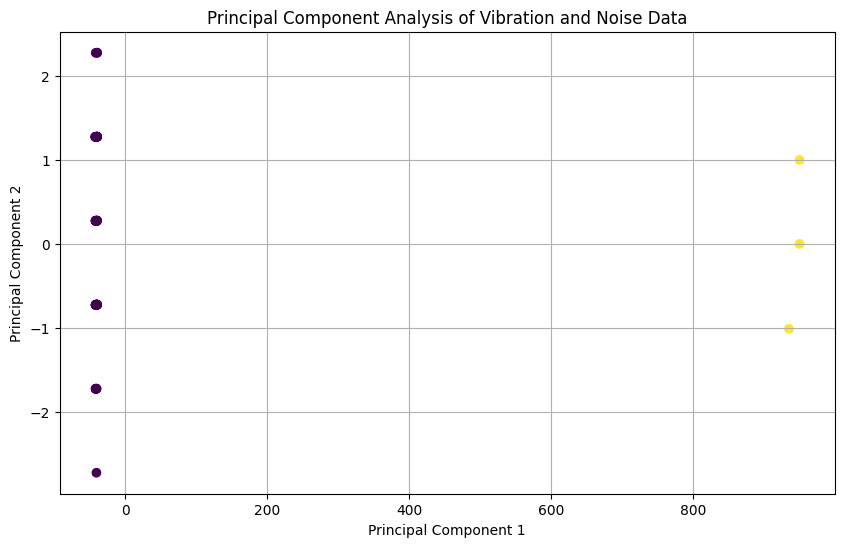

[[15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Centering the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc1_values, threshold):
    health_status = ['Normal' if pc1 >= threshold else 'Faulty' for pc1 in pc1_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Step 1: Centering the Data
centered_data, mean = center_data(data)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data[:, 0])  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=pd.factorize(data['Predicted_Health_Status'])[0])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Vibration and Noise Data')
plt.grid(True)
plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Centering the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Extracting only the 'Noise' column for PCA
noise_data = data[['noise']]

# Step 1: Centering the Data
centered_data, mean = center_data(noise_data)

# Reshape the centered data to 2D array
centered_data = centered_data.values.reshape(-1, 1)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 1)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data)  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], [0]*len(transformed_data), c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.title('Principal Component Analysis of Noise Data')
plt.grid(True)

# Plotting the threshold line
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: 'preprocessed.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Extracting only the 'Noise' column for PCA
noise_data = data[['Noise']]

# Step 1: Centering the Data
centered_data, mean = center_data(noise_data)

# Reshape the centered data to 2D array
centered_data = centered_data.values.reshape(-1, 1)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 1)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data)  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], [0]*len(transformed_data), c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.title('Principal Component Analysis of Noise Data')
plt.grid(True)

# Plotting the threshold line
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y


SyntaxError: incomplete input (<ipython-input-12-c3775c9f7a4e>, line 110)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Extracting only the 'Noise' column for PCA
noise_data = data[['noise']]

# Step 1: Centering the Data
centered_data, mean = center_data(noise_data)

# Reshape the centered data to 2D array
centered_data = centered_data.values.reshape(-1, 1)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 1)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data)  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], [0]*len(transformed_data), c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.title('Principal Component Analysis of Noise Data')
plt.grid(True)

# Plotting the threshold line
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Extracting only the 'Noise' column for PCA
noise_data = data[['noise']]

# Step 1: Centering the Data
centered_data, mean = center_data(noise_data)

# Reshape the centered data to 2D array
centered_data_2d = centered_data.values.reshape(-1, 1)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data_2d)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 1)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data_2d, principal_components)

# Reshape the transformed data to 2D array
transformed_data_2d = transformed_data.reshape(-1, 1)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data_2d)  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data_2d[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2d[:, 0], [0]*len(transformed_data_2d), c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.title('Principal Component Analysis of Noise Data')
plt.grid(True)

# Plotting the threshold line
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data_2d
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Extracting only the 'Noise' column for PCA
noise_data = data[['noise']]

# Step 1: Centering the Data
centered_data, mean = center_data(noise_data)

# Reshape the centered data to 2D array
centered_data_2d = centered_data.values.reshape(-1, 1)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data_2d)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 1)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data_2d, principal_components)

# Reshape the transformed data to 2D array
transformed_data_2d = transformed_data.reshape(-1, 1)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data_2d)  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data_2d[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2d[:, 0], [0]*len(transformed_data_2d), c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.title('Principal Component Analysis of Noise Data')
plt.grid(True)

# Plotting the threshold line
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data_2d
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

Explained variance ratio: [9.99969966e-01 3.00338434e-05]


IndexError: index 100 is out of bounds for axis 0 with size 2

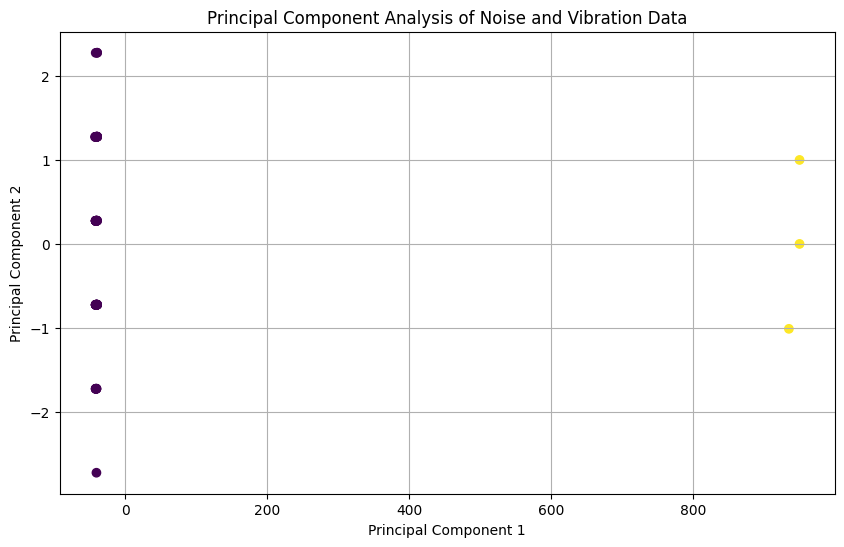

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('1.csv')

# Extracting 'Noise' and 'Vibration' columns for PCA
features = data[['noise', 'vibration']]

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Reshape the centered data to 2D array
centered_data_2d = centered_data.values

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data_2d)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data_2d, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data, axis=0)  # Using mean of PC1 and PC2 as thresholds
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold[0])

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Noise and Vibration Data')
plt.grid(True)

# Plotting the threshold lines
plt.axvline(x=threshold[1], color='r', linestyle='--', label=f'Threshold PC1: {threshold[0]:.2f}')
plt.axhline(y=threshold[1], color='b', linestyle='--', label=f'Threshold PC2: {threshold[1]:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Explained variance ratio: [9.99969966e-01 3.00338434e-05]


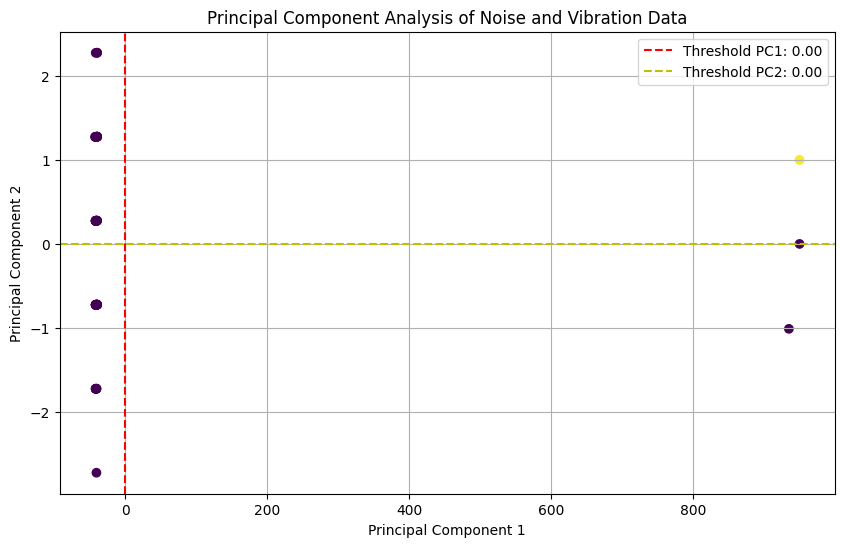

[[15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold_pc1, threshold_pc2):
    health_status = ['Normal' if pc1 >= threshold_pc1 and pc2 >= threshold_pc2 else 'Faulty'
                     for pc1, pc2 in pc_values]
    return health_status

# Load data
data = pd.read_csv('1.csv')

# Extracting 'Noise' and 'Vibration' columns for PCA
features = data[['noise', 'vibration']]

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Reshape the centered data to 2D array
centered_data_2d = centered_data.values

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data_2d)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data_2d, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Manually set threshold values
threshold_pc1 = 0  # Example value
threshold_pc2 = 0  # Example value

# Classify Health Status based on Threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data, threshold_pc1, threshold_pc2)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Noise and Vibration Data')
plt.grid(True)

# Plotting the threshold lines
plt.axvline(x=threshold_pc1, color='r', linestyle='--', label=f'Threshold PC1: {threshold_pc1:.2f}')
plt.axhline(y=threshold_pc2, color='y', linestyle='--', label=f'Threshold PC2: {threshold_pc2:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Explained variance ratio: [0.77716238 0.22283762]


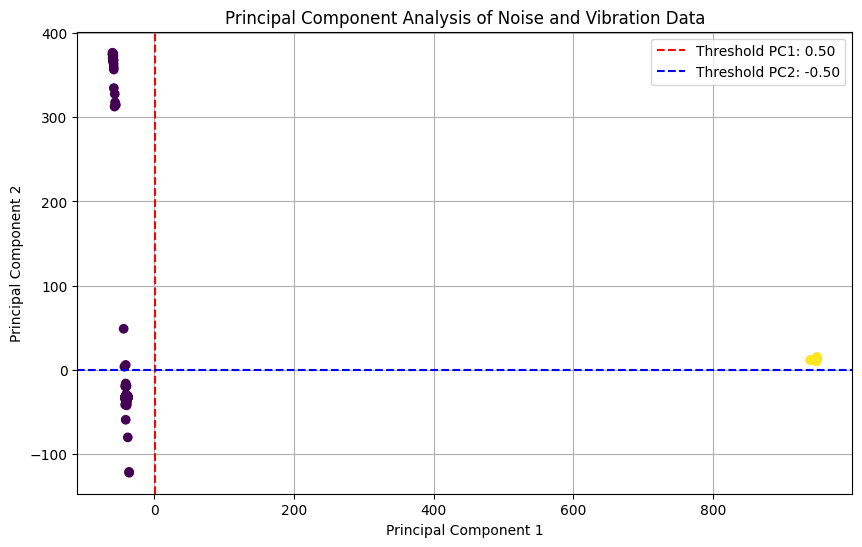

[[46  0]
 [ 0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00         2

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold_pc1, threshold_pc2):
    health_status = ['Normal' if pc1 >= threshold_pc1 and pc2 >= threshold_pc2 else 'Faulty'
                     for pc1, pc2 in pc_values]
    return health_status

# Load data
data = pd.read_csv('t.csv')

# Extracting 'Noise', 'Vibration', and 'Timestamp' columns for PCA
features = data[['Sound', 'Vibration']]
timestamp = data['Date Time']

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Reshape the centered data to 2D array
centered_data_2d = centered_data.values

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data_2d)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data_2d, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Manually set threshold values
threshold_pc1 = 0.5  # Example value
threshold_pc2 = -0.5  # Example value

# Classify Health Status based on Threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data, threshold_pc1, threshold_pc2)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1],
            c=pd.factorize(data['Predicted_Health_Status'])[0],
            cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Noise and Vibration Data')
plt.grid(True)

# Plotting the threshold lines
plt.axvline(x=threshold_pc1, color='r', linestyle='--', label=f'Threshold PC1: {threshold_pc1:.2f}')
plt.axhline(y=threshold_pc2, color='b', linestyle='--', label=f'Threshold PC2: {threshold_pc2:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


<ipython-input-2-56d184d508f2>:55: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format


Explained variance ratio: [0.77716238 0.22283762]


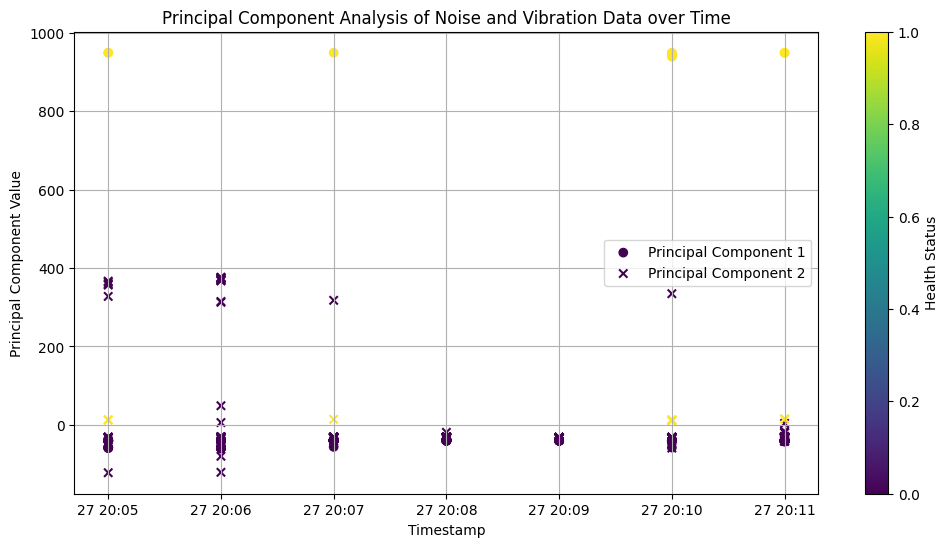

[[44  0]
 [ 0  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00         4

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold_pc1, threshold_pc2):
    health_status = ['Normal' if pc1 >= threshold_pc1 and pc2 >= threshold_pc2 else 'Faulty'
                     for pc1, pc2 in pc_values]
    return health_status

# Load data
data = pd.read_csv('final.csv')

# Extracting 'Noise', 'Vibration', and 'Timestamp' columns for PCA
features = data[['Sound', 'Vibration']]
timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format

# Step 1: Centering the Data

centered_data, mean = center_data(features)

# Reshape the centered data to 2D array
centered_data_2d = centered_data.values

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data_2d)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data_2d, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Manually set threshold values
threshold_pc1 = 0.5  # Example value
threshold_pc2 = -0.5  # Example value

# Classify Health Status based on Threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data, threshold_pc1, threshold_pc2)

# Visualization
plt.figure(figsize=(12, 6))

# Plotting using Timestamp for color differentiation
plt.scatter(timestamp, transformed_data[:, 0],
            c=pd.factorize(data['Predicted_Health_Status'])[0],
            cmap='viridis', label='Principal Component 1')
plt.scatter(timestamp, transformed_data[:, 1],
            c=pd.factorize(data['Predicted_Health_Status'])[0],
            cmap='viridis', marker='x', label='Principal Component 2')

plt.xlabel('Timestamp')
plt.ylabel('Principal Component Value')
plt.title('Principal Component Analysis of Noise and Vibration Data over Time')
plt.grid(True)
plt.colorbar(label='Health Status')
plt.legend()
plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets based on time (e.g., 80% for training, 20% for testing)
split_index = int(0.8 * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold_pc1, threshold_pc2):
    health_status = ['Normal' if pc1 >= threshold_pc1 and pc2 >= threshold_pc2 else 'Faulty'
                     for pc1, pc2 in pc_values]
    return health_status

# Load data
data = pd.read_csv('final.csv')

# Extracting 'Noise', 'Vibration', and 'Timestamp' columns for PCA
features = data[['Sound', 'Vibration']]
timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Manually set threshold values
threshold_pc1 = 0.5  # Example value
threshold_pc2 = -0.5  # Example value

# Classify Health Status based on Threshold
pc_values = zip(transformed_data[:, 0], transformed_data[:, 1])
data['Predicted_Health_Status'] = classify_health_status(pc_values, threshold_pc1, threshold_pc2)

# Split the data into training and testing sets based on time (e.g., 80% for training, 20% for testing)
split_index = int(0.8 * len(transformed_data))
X_train, X_test = transformed_data[:split_index], transformed_data[split_index:]

# Define actual labels (if available)
actual_labels = np.where(data['Predicted_Health_Status'] == 'Normal', 0, 1)
y_test = actual_labels[split_index:]

# Define logistic regression parameters
learning_rate = 0.01
num_epochs = 1000
threshold = 0.5

# Initialize weights
np.random.seed(0)
num_features = X_train.shape[1]
weights = np.random.randn(num_features)

# Train logistic regression model
for epoch in range(num_epochs):
    # Forward pass
    logits = np.dot(X_train, weights)
    y_pred = 1 / (1 + np.exp(-logits))

    # Backward pass
    gradient = np.dot(X_train.T, (y_pred - y_train)) / len(y_train)

    # Update weights
    weights -= learning_rate * gradient

# Predict on the testing set
logits_test = np.dot(X_test, weights)
y_pred = np.where(1 / (1 + np.exp(-logits_test)) > threshold, 1, 0)

# Manually calculate confusion matrix
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Explained variance ratio: [0.77716238 0.22283762]
Confusion Matrix:
[[ 0  4]
 [44  0]]


<ipython-input-3-90b5c8349861>:51: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format


<ipython-input-4-cbe0c3219850>:76: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format


Explained variance ratio: [0.77716238 0.22283762]
Accuracy: 0.0


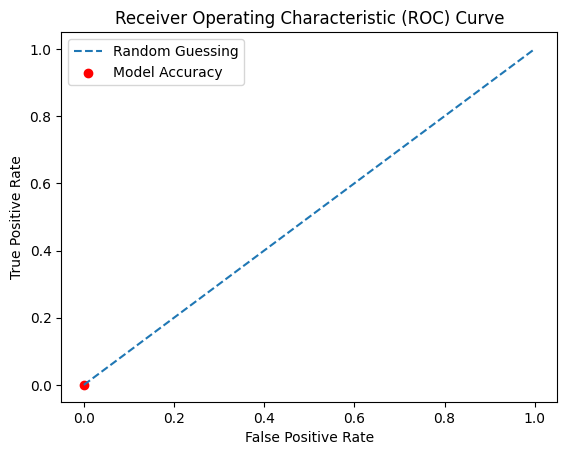

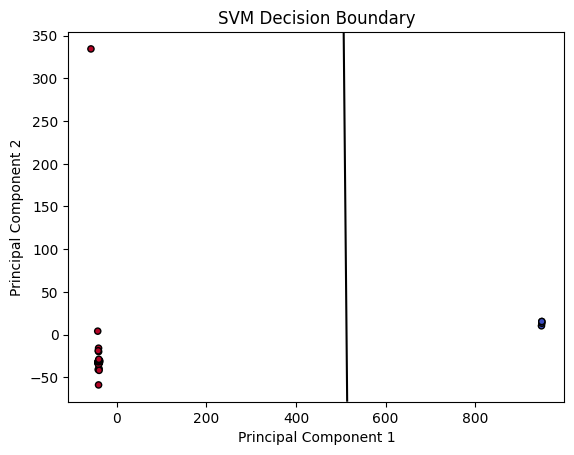

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold_pc1, threshold_pc2):
    health_status = ['Normal' if pc1 >= threshold_pc1 and pc2 >= threshold_pc2 else 'Faulty'
                     for pc1, pc2 in pc_values]
    return health_status

# Define a function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Define function to plot decision boundary
def plot_decision_boundary(X, y, clf):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# Load data
data = pd.read_csv('final.csv')

# Extracting 'Noise', 'Vibration', and 'Timestamp' columns for PCA
features = data[['Sound', 'Vibration']]
timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Manually set threshold values
threshold_pc1 = 0.5  # Example value
threshold_pc2 = -0.5  # Example value

# Classify Health Status based on Threshold
pc_values = zip(transformed_data[:, 0], transformed_data[:, 1])
data['Predicted_Health_Status'] = classify_health_status(pc_values, threshold_pc1, threshold_pc2)

# Split the data into training and testing sets based on time (e.g., 80% for training, 20% for testing)
split_index = int(0.8 * len(transformed_data))
X_train, X_test = transformed_data[:split_index], transformed_data[split_index:]

# Define actual labels (if available)
actual_labels = np.where(data['Predicted_Health_Status'] == 'Normal', 0, 1)
y_test = actual_labels[split_index:]

# Define logistic regression parameters
learning_rate = 0.01
num_epochs = 1000
threshold = 0.5

# Initialize weights
np.random.seed(0)
num_features = X_train.shape[1]
weights = np.random.randn(num_features)

# Train logistic regression model
for epoch in range(num_epochs):
    # Forward pass
    logits = np.dot(X_train, weights)
    y_pred = 1 / (1 + np.exp(-logits))

    # Backward pass
    gradient = np.dot(X_train.T, (y_pred - y_train)) / len(y_train)

    # Update weights
    weights -= learning_rate * gradient

# Predict on the testing set
logits_test = np.dot(X_test, weights)
y_pred = np.where(1 / (1 + np.exp(-logits_test)) > threshold, 1, 0)

# Calculate accuracy
accuracy = calculate_accuracy(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot accuracy graph
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')  # Random guessing line
plt.scatter(accuracy, 0, color='red', label='Model Accuracy')  # Model accuracy point
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot decision boundary
plot_decision_boundary(X_test, y_test, clf)


<ipython-input-5-d447bb84167e>:84: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format


Explained variance ratio: [0.77716238 0.22283762]
Accuracy: 0.0
Confusion Matrix:
[[ 0  4]
 [44  0]]


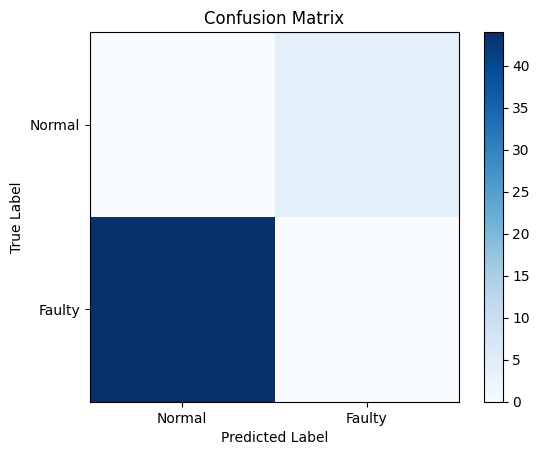

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold_pc1, threshold_pc2):
    health_status = ['Normal' if pc1 >= threshold_pc1 and pc2 >= threshold_pc2 else 'Faulty'
                     for pc1, pc2 in pc_values]
    return health_status

# Define a function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Define function to plot decision boundary
def plot_decision_boundary(X, y, clf):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# Define function to compute confusion matrix
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])

# Load data
data = pd.read_csv('final.csv')

# Extracting 'Noise', 'Vibration', and 'Timestamp' columns for PCA
features = data[['Sound', 'Vibration']]
timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Manually set threshold values
threshold_pc1 = 0.5  # Example value
threshold_pc2 = -0.5  # Example value

# Classify Health Status based on Threshold
pc_values = zip(transformed_data[:, 0], transformed_data[:, 1])
data['Predicted_Health_Status'] = classify_health_status(pc_values, threshold_pc1, threshold_pc2)

# Split the data into training and testing sets based on time (e.g., 80% for training, 20% for testing)
split_index = int(0.8 * len(transformed_data))
X_train, X_test = transformed_data[:split_index], transformed_data[split_index:]

# Define actual labels (if available)
actual_labels = np.where(data['Predicted_Health_Status'] == 'Normal', 0, 1)
y_test = actual_labels[split_index:]

# Define logistic regression parameters
learning_rate = 0.01
num_epochs = 1000
threshold = 0.5

# Initialize weights
np.random.seed(0)
num_features = X_train.shape[1]
weights = np.random.randn(num_features)

# Train logistic regression model
for epoch in range(num_epochs):
    # Forward pass
    logits = np.dot(X_train, weights)
    y_pred = 1 / (1 + np.exp(-logits))

    # Backward pass
    gradient = np.dot(X_train.T, (y_pred - y_train)) / len(y_train)

    # Update weights
    weights -= learning_rate * gradient

# Predict on the testing set
logits_test = np.dot(X_test, weights)
y_pred = np.where(1 / (1 + np.exp(-logits_test)) > threshold, 1, 0)

# Calculate accuracy
accuracy = calculate_accuracy(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Faulty'])
plt.yticks([0, 1], ['Normal', 'Faulty'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<ipython-input-2-e48becbaaf6b>:84: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format


Explained variance ratio: [0.77716238 0.22283762]


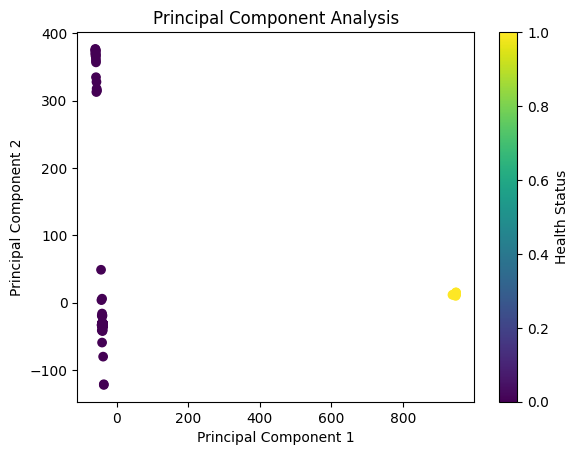

NameError: name 'y_train' is not defined

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold_pc1, threshold_pc2):
    health_status = ['Normal' if pc1 >= threshold_pc1 and pc2 >= threshold_pc2 else 'Faulty'
                     for pc1, pc2 in pc_values]
    return health_status

# Define a function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Define function to plot decision boundary
def plot_decision_boundary(X, y, clf):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# Define function to compute confusion matrix
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])

# Load data
data = pd.read_csv('t.csv')

# Extracting 'Noise', 'Vibration', and 'Timestamp' columns for PCA
features = data[['Sound', 'Vibration']]
timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Manually set threshold values
threshold_pc1 = 0.5  # Example value
threshold_pc2 = -0.5  # Example value

# Classify Health Status based on Threshold
pc_values = zip(transformed_data[:, 0], transformed_data[:, 1])
data['Predicted_Health_Status'] = classify_health_status(pc_values, threshold_pc1, threshold_pc2)

# Generate Principal Component Graph
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.colorbar(label='Health Status')
plt.show()

# Split the data into training and testing sets based on time (e.g., 80% for training, 20% for testing)
split_index = int(0.8 * len(transformed_data))
X_train, X_test = transformed_data[:split_index], transformed_data[split_index:]

# Define actual labels (if available)
actual_labels = np.where(data['Predicted_Health_Status'] == 'Normal', 0, 1)
y_test = actual_labels[split_index:]

# Define logistic regression parameters
learning_rate = 0.01
num_epochs = 1000
threshold = 0.5

# Initialize weights
np.random.seed(0)
num_features = X_train.shape[1]
weights = np.random.randn(num_features)

# Train logistic regression model
for epoch in range(num_epochs):
    # Forward pass
    logits = np.dot(X_train, weights)
    y_pred = 1 / (1 + np.exp(-logits))

    # Backward pass
    gradient = np.dot(X_train.T, (y_pred - y_train)) / len(y_train)

    # Update weights
    weights -= learning_rate * gradient

# Predict on the testing set
logits_test = np.dot(X_test, weights)
y_pred = np.where(1 / (1 + np.exp(-logits_test)) > threshold, 1, 0)

# Calculate accuracy
accuracy = calculate_accuracy(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Faulty'])
plt.yticks([0, 1], ['Normal', 'Faulty'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<ipython-input-6-be766a5832a8>:63: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format


Explained variance ratio: [0.77716238 0.22283762]


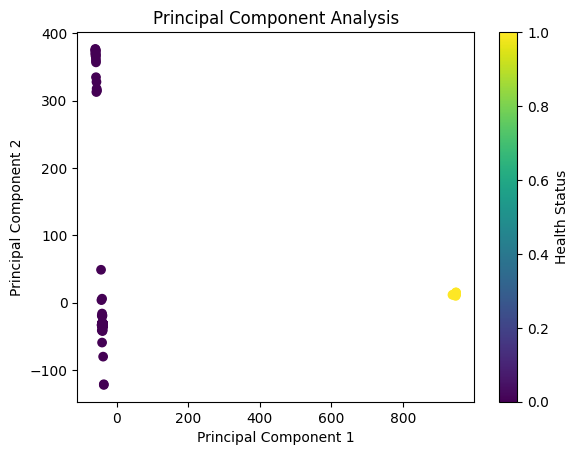

Accuracy: 0.9166666666666666
Confusion Matrix:
[[44  4]
 [ 0  0]]


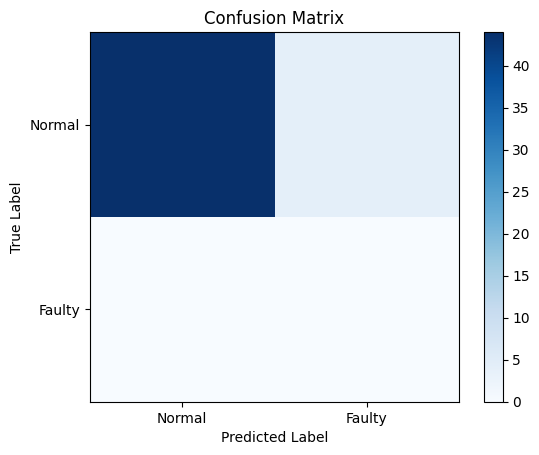

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold_pc1, threshold_pc2):
    health_status = ['Normal' if pc1 >= threshold_pc1 and pc2 >= threshold_pc2 else 'Faulty'
                     for pc1, pc2 in pc_values]
    return health_status

# Define a function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Define function to compute confusion matrix
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])

# Load data
data = pd.read_csv('t.csv')

# Extracting 'Noise', 'Vibration', and 'Timestamp' columns for PCA
features = data[['Sound', 'Vibration']]
timestamp = pd.to_datetime(data['datetime'])  # Convert to datetime format

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Manually set threshold values
threshold_pc1 = 0.5  # Example value
threshold_pc2 = -0.5  # Example value

# Classify Health Status based on Threshold
pc_values = zip(transformed_data[:, 0], transformed_data[:, 1])
data['Predicted_Health_Status'] = classify_health_status(pc_values, threshold_pc1, threshold_pc2)

# Generate Principal Component Graph
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.colorbar(label='Health Status')
plt.show()

# Split the data into training and testing sets based on time (e.g., 80% for training, 20% for testing)
split_index = int(0.8 * len(transformed_data))
X_train, X_test = transformed_data[:split_index], transformed_data[split_index:]

# Define actual labels (if available)
actual_labels = np.where(data['Predicted_Health_Status'] == 'Normal', 0, 1)
y_train, y_test = actual_labels[:split_index], actual_labels[split_index:]

# Define logistic regression parameters
learning_rate = 0.01
num_epochs = 1000
threshold = -5

# Initialize weights
np.random.seed(0)
num_features = X_train.shape[1]
weights = np.random.randn(num_features)

# Train logistic regression model
for epoch in range(num_epochs):
    # Forward pass
    logits = np.dot(X_train, weights)
    y_pred = 1 / (1 + np.exp(-logits))

    # Backward pass
    gradient = np.dot(X_train.T, (y_pred - y_train)) / len(y_train)

    # Update weights
    weights -= learning_rate * gradient

# Predict on the testing set
logits_test = np.dot(X_test, weights)
y_pred = np.where(1 / (1 + np.exp(-logits_test)) > threshold, 1, 0)

# Calculate accuracy
accuracy = calculate_accuracy(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Faulty'])
plt.yticks([0, 1], ['Normal', 'Faulty'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Explained variance ratio: [0.77716238 0.22283762]
             datetime  Sound  Vibration Predicted_Health_Status  \
0    27-02-2024 20:05    520         32                  Faulty   
1    27-02-2024 20:05    519         32                  Faulty   
2    27-02-2024 20:05    609         33                  Faulty   
3    27-02-2024 20:05    521         32                  Faulty   
4    27-02-2024 20:05    518         32                  Faulty   
..                ...    ...        ...                     ...   
235  27-02-2024 20:11    517       1023                  Normal   
236  27-02-2024 20:11    518         33                  Faulty   
237  27-02-2024 20:11    518         32                  Faulty   
238  27-02-2024 20:11    517         33                  Faulty   
239  27-02-2024 20:11    516         33                  Faulty   

    Predicted_Health_Status_SVM  
0                        Normal  
1                        Normal  
2                        Normal  
3        

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
235    Normal
236    Normal
237    Normal
238    Normal
239    Normal
Name: Predicted_Health_Status_SVM, Length: 240, dtype: object

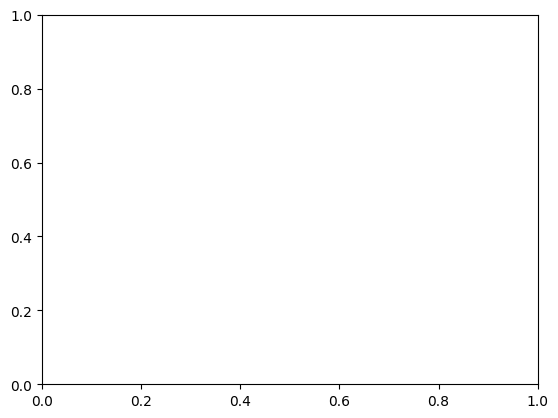

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold_pc1, threshold_pc2):
    health_status = ['Normal' if pc1 >= threshold_pc1 and pc2 >= threshold_pc2 else 'Faulty'
                     for pc1, pc2 in pc_values]
    return health_status

# Load data
data = pd.read_csv('t.csv')

# Extracting 'Noise', 'Vibration', and 'Timestamp' columns for PCA
features = data[['Sound', 'Vibration']]

# Step 1: Centering the Data
centered_data, mean = center_data(features.values)

# Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Manually set threshold values
threshold_pc1 = 0.5  # Example value
threshold_pc2 = -0.5  # Example value

# Classify Health Status based on Threshold
pc_values = zip(transformed_data[:, 0], transformed_data[:, 1])
data['Predicted_Health_Status'] = classify_health_status(pc_values, threshold_pc1, threshold_pc2)

# Define a function to fit the single-class SVM
def fit_single_class_svm(data, nu=0.1):
    # Fit single-class SVM
    def kernel(x, y):
        return np.dot(x, y.T)

    n_samples, n_features = data.shape
    w = np.zeros(n_features)
    b = 0

    learning_rate = 0.01
    epochs = 1000

    for epoch in range(epochs):
        for i in range(n_samples):
            if np.sum(w) == 0:  # Initialize weights
                w = np.random.randn(n_features)

            if np.dot(w, data[i]) + b < 1:
                w = w + learning_rate * (data[i] - (2 * nu * w))
                b = b + learning_rate * (2 * nu)
            else:
                w = w
                b = b

    return w, b

# Fit single-class SVM
weights, bias = fit_single_class_svm(transformed_data)

# Predict health status based on the single-class SVM
decision_function_values = np.dot(transformed_data, weights) + bias
predictions = np.where(decision_function_values >= 0, 'Normal', 'Faulty')
data['Predicted_Health_Status_SVM'] = predictions

# Display data with predicted health status
print(data)

# Plot the data points
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=data['Predicted_Health_Status_SVM'], cmap='coolwarm', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary')
plt.show()
